<a href="https://colab.research.google.com/github/viva198/zadaniya/blob/main/tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

## Данные

Прогнозируйте признак gamma_GTP (фермент (белок) печени и поджелудочной железы). Активность этого фермента в крови повышается при заболеваниях печени и злоупотреблении алкоголем

In [8]:
train = pd.read_csv('/content/train.csv')
train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,Female,45,150,50,70.0,1.0,0.9,1.0,1.0,102.0,...,203.0,77.0,94.0,160.0,13.5,1.0,0.6,18.0,10.0,20.0
1,Male,25,175,65,76.0,1.5,1.5,1.0,1.0,109.0,...,133.0,51.0,69.0,65.0,15.4,1.0,0.9,14.0,11.0,14.0
2,Male,55,160,75,98.0,1.0,0.9,1.0,1.0,124.0,...,207.0,43.0,137.0,136.0,14.8,1.0,1.0,39.0,44.0,80.0
3,Male,55,170,70,87.0,1.0,0.3,1.0,1.0,116.0,...,197.0,39.0,131.0,133.0,15.7,1.0,1.0,17.0,16.0,17.0
4,Female,70,145,55,87.5,0.3,0.1,1.0,1.0,119.0,...,150.0,53.0,79.0,91.0,12.7,4.0,1.1,20.0,12.0,10.0


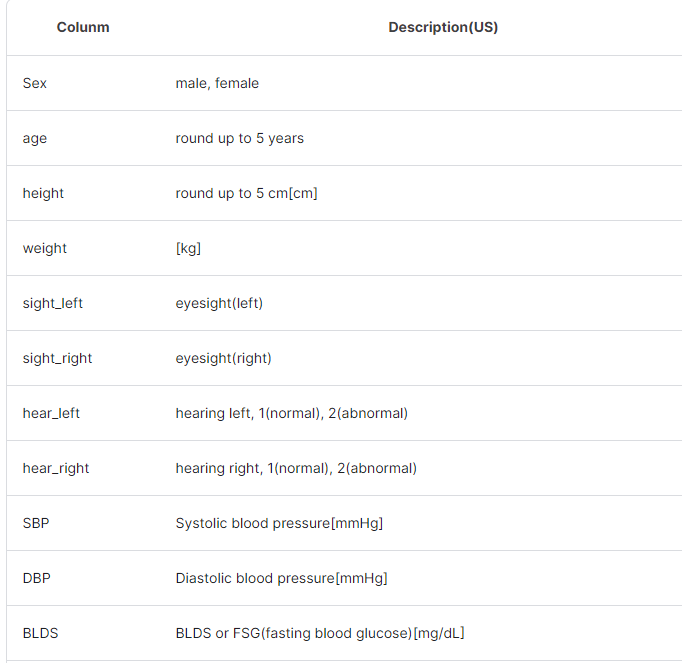

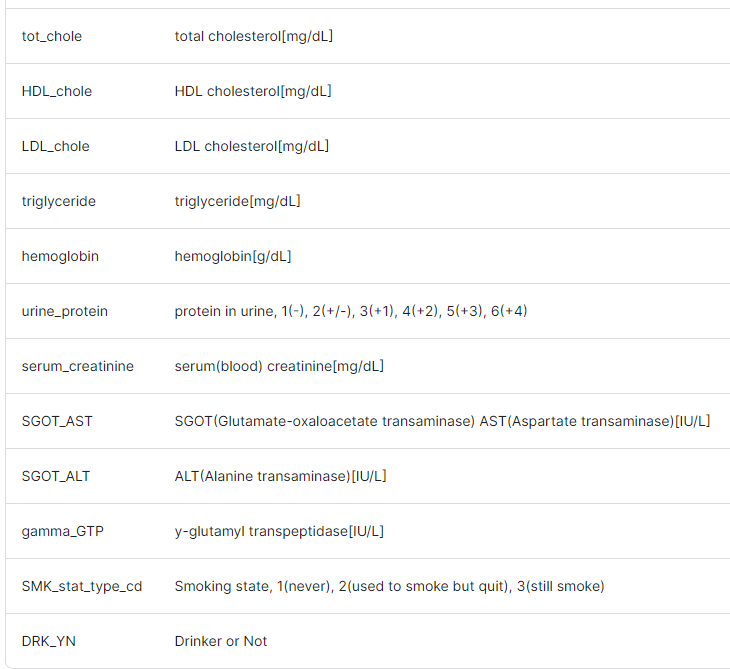

Решаем задачу регрессии - предсказываем значение Gamma_GTP

## Задания

In [ ]:
## 1 - обработайте категориальные значения

In [9]:
train['sex']=train['sex'].map({'Male':1,'Female':0})

In [ ]:
## 2 - выделите признаки(X) и результирующую (Y), стандартизируйте признаки, разбейте данные на обучающую, валидационную и тестовую выборки

In [10]:
from sklearn.preprocessing import StandardScaler
X=train.drop(['gamma_GTP'],axis=1)
Y=train['gamma_GTP']

In [13]:
scaler = StandardScaler()
scal_X = scaler.fit_transform(X)
scal_X = pd.DataFrame(scal_X, columns=X.columns)

In [14]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [ ]:
## 3 - создайте нейронную сеть с помощью Keras c одним скрытым слоем с 50 нейронами (функция активации - relu), метрика - mse
## обучите сеть

In [16]:
from tensorflow import keras #pip install tensorflow
import tensorflow as tf

In [17]:
#создание модели с помощью Sequential
model = keras.models.Sequential()

In [18]:
X_train.shape[1:]

(21,)

In [20]:
#добавляем слои в модель

model.add(keras.layers.Dense(20,activation='relu',input_shape=X_train.shape[1:])),
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(1,activation='relu'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              41 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,462 (9.62 KB)

 Trainable params: 2,462 (9.62 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#получить параметры скрытого слоя
hidden0 = model.layers[0]
weights,biases = hidden0.get_weights()

In [23]:
weights.shape

(21, 20)

In [24]:
#компилируем модель
model.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse'])

In [25]:
#обучение модели
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2071.1023 - mse: 2071.1023 - val_loss: 1866.7738 - val_mse: 1866.7738
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1744.3561 - mse: 1744.3561 - val_loss: 1750.6493 - val_mse: 1750.6493
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1640.9988 - mse: 1640.9988 - val_loss: 1721.2795 - val_mse: 1721.2795
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1622.0822 - mse: 1622.0822 - val_loss: 1795.4579 - val_mse: 1795.4579
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1541.2803 - mse: 1541.2803 - val_loss: 1669.8708 - val_mse: 1669.8708
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1578.5776 - mse: 1578.5776 - val_loss: 1687.3981 - val_mse: 1687.3981
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1517.6373 - mse: 1517.6373 - val_loss: 1653.7678 - val_mse: 1653.7678
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1519.7444 -

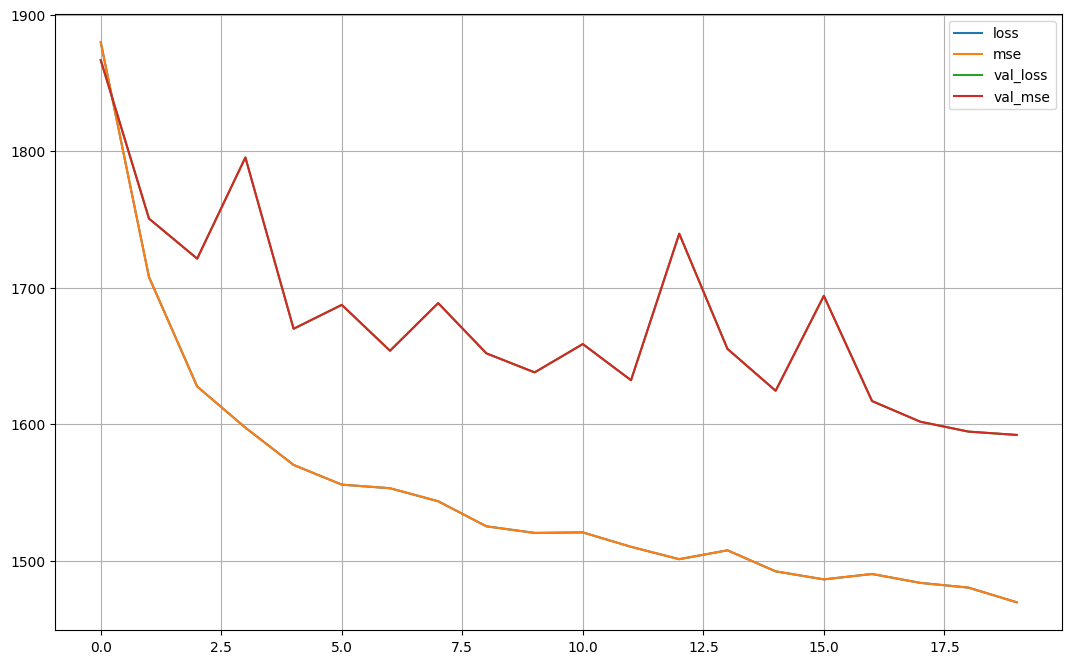

In [26]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [ ]:
## 4 - оцените качество модели на тестовой выборке

In [27]:
#проверка на тестовых данных
model.evaluate(X_test,y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1407.6407 - mse: 1407.6407


[2475.22216796875, 2475.22216796875]

In [28]:
#предсказание
y_pred = model.predict(X_test)
y_pred[:10]

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[16.605013],
       [35.72571 ],
       [16.605013],
       [61.40465 ],
       [39.720936],
       [37.394012],
       [26.327517],
       [33.082775],
       [47.194622],
       [16.605013]], dtype=float32)

In [ ]:
## 5 - постройте вторую сеть, где будет уже два скрытых слоя - количество нейронов выбираете сами, обучите модель, оцените качество

In [30]:
#создание модели с помощью Sequential
model2 = keras.models.Sequential()

In [37]:
X_train.shape[2:]

()

In [39]:
#добавляем слои в модель

model2.add(keras.layers.Dense(20,activation='relu',input_shape=X_train.shape[2:])),
model2.add(keras.layers.Dense(50,activation='relu'))
model2.add(keras.layers.Dense(1,activation='relu'))

In [40]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,823 (14.93 KB)

 Trainable params: 3,823 (14.93 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#получить параметры скрытого слоя
hidden0 = model.layers[0]
weights,biases = hidden0.get_weights()

In [51]:
#получить параметры скрытого слоя
hidden1 = model.layers[1]
weights,biases = hidden0.get_weights()

In [52]:
weights.shape

(20, 40)

In [53]:
model2.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse'])

In [54]:
#обучение модели
history = model2.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1511.1455 - mse: 1511.1455 - val_loss: 1620.6256 - val_mse: 1620.6256
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1505.2396 - mse: 1505.2396 - val_loss: 1607.3915 - val_mse: 1607.3915
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1498.4723 - mse: 1498.4723 - val_loss: 1659.4425 - val_mse: 1659.4425
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1469.7460 - mse: 1469.7460 - val_loss: 1644.5900 - val_mse: 1644.5900
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1574.0906 - mse: 1574.0906 - val_loss: 1691.4418 - val_mse: 1691.4418
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1560.6862 - mse: 1560.6862 - val_loss: 1590.1582 - val_mse: 1590.1582
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1387.7504 - mse: 1387.7504 - val_loss: 1711.6455 - val_mse: 1711.6455
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1487.6055 - 

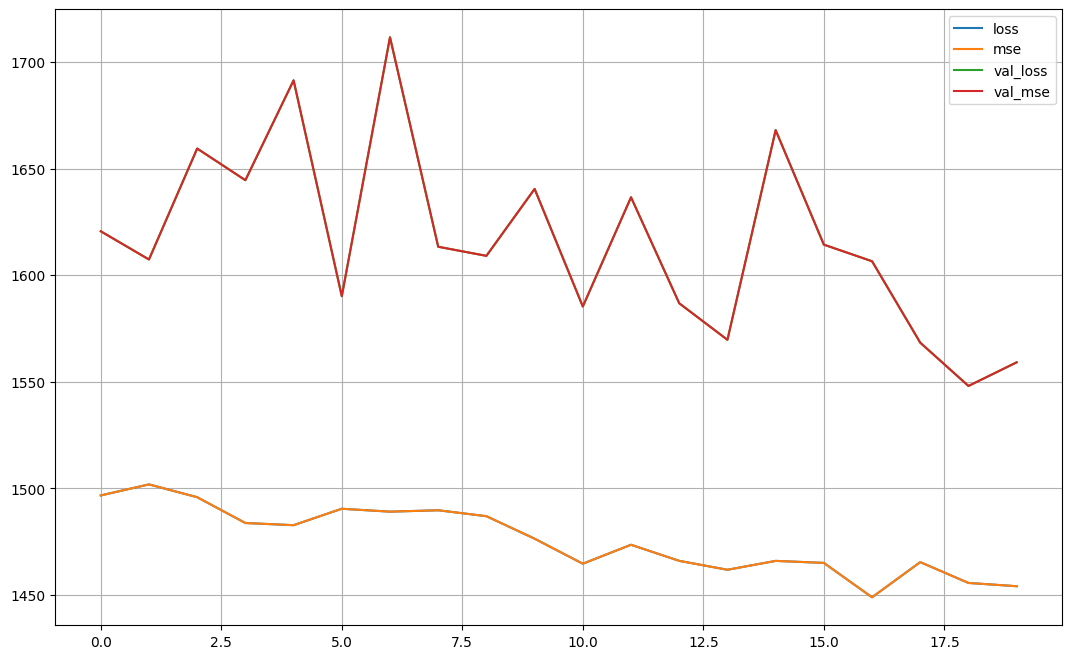

In [55]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [56]:
model2.evaluate(X_test,y_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1380.1929 - mse: 1380.1929


[2035.0631103515625, 2035.0631103515625]

In [57]:
#предсказание
y_pred2 = model2.predict(X_test)
y_pred2[:10]

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[15.449119],
       [38.53883 ],
       [15.448394],
       [41.45928 ],
       [34.93765 ],
       [40.17688 ],
       [28.214067],
       [30.316202],
       [39.497375],
       [16.106459]], dtype=float32)

In [ ]:
## 6 - постройте график с тремя линиями (реальные значения, предсказанные с помощью 1 модели, предсказанные с помощью 2 модели)

In [60]:
true_vs_pred = pd.DataFrame({'Истинные': y_test, 'Предсказанные1': y_pred.reshape(-1), 'Предсказанные2': y_pred2.reshape(-1)})

import plotly.graph_objects as go
import numpy as np

random_x = np.linspace(0, len(true_vs_pred['Истинные']))

fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Истинные'],
                    mode='lines',
                    name='истинные'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные1'],
                    mode='lines+markers',
                    name='предсказанные1'))
fig.add_trace(go.Scatter(x=random_x, y=true_vs_pred['Предсказанные2'],
                    mode='lines+markers',
                    name='предсказанные2'))

fig.show()

In [ ]:
# для тестового набора данных с помощью вашей модели предскажите значение GammaGTP, метрика для проверки MAE

In [61]:
test_features = pd.read_csv('/content/test_features.csv')
test_features.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT
0,Female,45,155,55,73.0,0.8,0.6,1.0,1.0,107.0,...,100.0,148.0,56.0,78.0,69.0,9.3,1.0,0.8,14.0,9.0
1,Male,65,165,65,83.0,0.5,0.5,1.0,1.0,172.0,...,143.0,209.0,49.0,143.0,84.0,14.1,1.0,0.6,19.0,19.0
2,Male,70,165,70,88.0,0.5,0.9,1.0,2.0,120.0,...,83.0,206.0,77.0,112.0,116.0,14.6,1.0,0.9,15.0,12.0
3,Male,50,160,65,87.0,1.0,0.8,1.0,1.0,142.0,...,74.0,90.0,33.0,36.0,103.0,13.9,1.0,0.8,34.0,14.0
4,Male,35,170,65,87.0,1.0,1.0,1.0,1.0,120.0,...,161.0,255.0,60.0,135.0,298.0,15.8,1.0,0.7,23.0,28.0


In [67]:
test_features['sex']=test_features['sex'].map({'Female':0,'Male':1})
test_features = scaler.transform(test_features)

In [69]:
y_pred = model2.predict(test_features)
y_pred.reshape(-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([15.449119, 47.12015 , 38.973045, ..., 42.733955, 18.127644,
       36.54823 ], dtype=float32)

In [70]:
df = pd.DataFrame()
df['result']=y_pred.reshape(-1)
df.to_csv('Фамилия_Группа.csv',index=False)

In [ ]:
# результат прогноза для тестовой выборки просылаем в формате csv,
# где лежит только один столбец result, название файла - Фамилия_Группа.csv
# группа ИБ или БПМ - пример Бимбумбамов_ИБ.csv или Бимбумбамов_БПМ.csv


ссылка для загрузки файлов -